In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Features seletcion
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Train/test split
from sklearn.model_selection import train_test_split

# Models Supervised Learning
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

# Models Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


# Standard Scaller
from sklearn.preprocessing import StandardScaler

# Hyperparameters Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Models evaluation
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, auc, RocCurveDisplay
from sklearn.metrics import f1_score, classification_report

from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, adjusted_rand_score, fowlkes_mallows_score

# TPOT
import tpot
from tpot import TPOTClassifier

# Yellowbirck
from yellowbrick.cluster import KElbowVisualizer

#TPOT results:
from tpot.builtins import StackingEstimator
from sklearn.pipeline import make_pipeline, make_union
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\radek\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


For Machine Learning Part of the project :
I will test models:
- Logistic Regresion,
- Random forest Classifier. 
- Balanced Random Frest Classifier (since my 3 classes are really not ballanced).

Then I will apply tpot to see if there is another model/pipeline to be proposed.

In [2]:
paris_ml = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06_ML\paris_ready_for_ml.csv')

In [3]:
paris_ml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week,target
0,8.4,85.06,1.82,28.9,1006.1,26.7,24.8,0.0,43.0,30.0,22.0,42.0,0,1,1,0,0,1,2,0
1,9.9,81.63,4.96,29.2,1001.7,19.7,24.3,0.0,53.0,33.0,22.0,34.0,0,0,1,0,0,1,3,1
2,11.0,76.53,0.14,29.2,1006.0,20.1,20.4,0.0,50.0,28.0,23.0,41.0,0,1,1,0,0,1,4,0
3,9.1,80.53,0.67,21.5,1001.5,22.2,21.6,0.0,52.0,23.0,19.0,34.0,0,1,1,0,0,1,5,1
4,6.9,82.81,1.25,22.8,1007.5,22.8,24.0,0.0,45.0,20.0,20.0,30.0,0,1,1,0,0,1,6,0


In [4]:
paris_ml.shape

(2922, 20)

In [5]:
# I can drop columns with the pollutants as I want for the model to indirectly predict them
paris_ml.drop(columns=['pm25', 'pm10', 'o3', 'no2'], inplace=True)

In [6]:
paris_ml.shape

(2922, 16)

#### Separation of data into X and y 

In [7]:
X = paris_ml.drop(columns='target')
y =paris_ml['target']

In [8]:
# I will standarize the data as I am planning on using the Logistic Regression as well
sc = StandardScaler()
X_stand = sc.fit_transform(X)

In [9]:
X.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
0,8.4,85.06,1.82,28.9,1006.1,26.7,24.8,0.0,0,1,1,0,0,1,2
1,9.9,81.63,4.96,29.2,1001.7,19.7,24.3,0.0,0,0,1,0,0,1,3
2,11.0,76.53,0.14,29.2,1006.0,20.1,20.4,0.0,0,1,1,0,0,1,4
3,9.1,80.53,0.67,21.5,1001.5,22.2,21.6,0.0,0,1,1,0,0,1,5
4,6.9,82.81,1.25,22.8,1007.5,22.8,24.0,0.0,0,1,1,0,0,1,6


## Features selection

### Select From Model

In [10]:
# With RFC
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(X, y)


#Results
n_features = s.transform(X).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 7
Features selected:
Index(['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover', 'visibility',
       'uvindex'],
      dtype='object')


In [11]:
# With BRFC
SFM = SelectFromModel(estimator=BalancedRandomForestClassifier())
s=SFM.fit(X, y)


#Results
n_features = s.transform(X).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 7
Features selected:
Index(['temp', 'humidity', 'windspeed', 'pressure', 'cloudcover', 'visibility',
       'uvindex'],
      dtype='object')


In [12]:
# With LR - Logistic Regression
SFM = SelectFromModel(estimator=LogisticRegression())
s=SFM.fit(X_stand, y)


#Results
n_features = s.transform(X_stand).shape[1]
print(f'Number of features: {n_features}')
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
print(f'Features selected:\n{feature_name}') 

Number of features: 4
Features selected:
Index(['humidity', 'windspeed', 'visibility', 'uvindex'], dtype='object')


RFE - Recursive Feature Elimination

In [13]:
rfe_selector = RFE(estimator=RandomForestClassifier())
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 7
Selected Features: [ True  True False  True  True  True  True  True False False False False
 False False False]
Feature Ranking: [1 1 2 1 1 1 1 1 7 6 5 8 9 3 4]


RFECV

In [14]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=2,
    step=1,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
    cv=5,
)

m= rfecv.fit(X, y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


In [15]:
features_selected = X.columns[rfecv.support_]
features_selected

Index(['temp', 'humidity', 'precip', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'uvindex'],
      dtype='object')

In [16]:
# All of the features selectors suggest to work 7-8 columns alll of them greatly dependent on the weather. I will try two variants: 
# First with all of the columns.
# Second with just the columns proposed by the feature selection.

### Train test split

Data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2337, 15)
(2337,)
(585, 15)
(585,)


Standarized data

In [18]:
x_train_st, x_test_st, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=5)
print(x_train_st.shape)
print(y_train.shape)
print(x_test_st.shape)
print(y_test.shape)

(2337, 15)
(2337,)
(585, 15)
(585,)


Function to evaluate models

In [19]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    print("\nBalanced accuracy_score ", balanced_accuracy_score(y_test,predictions))
    print("\nF1_score ",f1_score(y_test,predictions, average='weighted'))
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'YlGn', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

### Hyperparameter Tunning 

Logistic Regression

In [20]:
grid_search = GridSearchCV(LogisticRegression(),
                           {
                              'max_iter': np.arange(100,400,50),
                              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                              'multi_class': ['auto', 'ovr', 'multinomial']
                            },cv=3, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_stand,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


C:\Users\radek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 483, in _check_multi_class
  

{'max_iter': 200, 'multi_class': 'multinomial', 'solver': 'sag'}
0.7069173372027756


C:\Users\radek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random Forest Classifier

In [21]:
rand_search = RandomizedSearchCV(RandomForestClassifier(),
                           {'bootstrap': [True, False],
                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'max_features': ['auto', 'sqrt'],
                            'min_samples_leaf': [1, 2, 4],
                            'min_samples_split': [2, 5, 10],
                            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
                            cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)
print(rand_search.best_params_)
print(rand_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}
0.6806466845345395


Balanced random Forest Classifier

In [22]:
rand_search = RandomizedSearchCV(BalancedRandomForestClassifier(),
                           {'bootstrap': [True, False],
                            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'max_features': ['auto', 'sqrt'],
                            'min_samples_leaf': [1, 2, 4],
                            'min_samples_split': [2, 5, 10],
                            'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
                            cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X,y)
print(rand_search.best_params_)
print(rand_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
0.772576439145888


## Models

### Logistic Regression

The accuracy of the Logistic Regression is: 76.23931623931624 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       181
           1       0.76      0.89      0.82       354
           2       0.85      0.58      0.69        50

    accuracy                           0.76       585
   macro avg       0.79      0.68      0.72       585
weighted avg       0.76      0.76      0.75       585


Balanced accuracy_score  0.6768888056517984

F1_score  0.7534575027700838


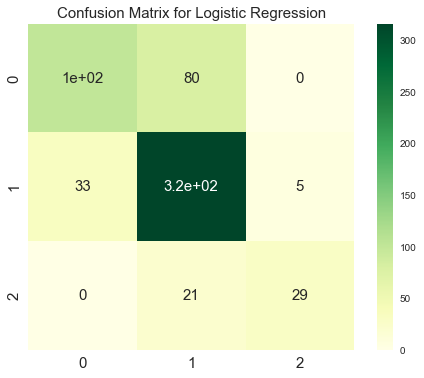

In [23]:
lr = LogisticRegression()
lr.fit(x_train_st, y_train)


# Results
y_pred = lr.predict(x_test_st)
# Predict probabilities
probs_y=lr.predict_proba(x_test_st)
### Print results 
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(x_test_st, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

### Random Forest Classifier

The accuracy of the Random Forest Classifier is: 75.55555555555556 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       181
           1       0.74      0.91      0.82       354
           2       0.73      0.32      0.44        50

    accuracy                           0.76       585
   macro avg       0.76      0.60      0.64       585
weighted avg       0.76      0.76      0.74       585


Balanced accuracy_score  0.6004967173372455

F1_score  0.7397080223442707


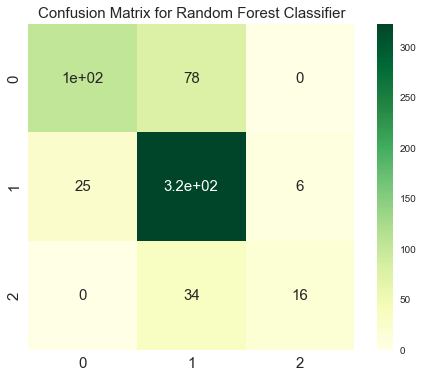

In [24]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

### Balanced random Forest Classifier

The accuracy of the Balanced Random Forest Classifier is: 70.76923076923077 %

The classification report for Balanced Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.64      0.78      0.71       181
           1       0.84      0.64      0.73       354
           2       0.48      0.92      0.63        50

    accuracy                           0.71       585
   macro avg       0.65      0.78      0.69       585
weighted avg       0.75      0.71      0.71       585


Balanced accuracy_score  0.780982821945459

F1_score  0.7121796316336324


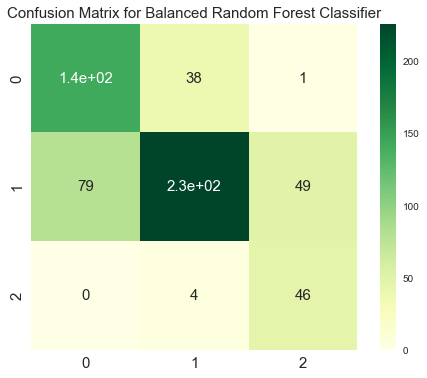

In [25]:
brfc = BalancedRandomForestClassifier()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Balanced Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Balanced Random Forest Classifier')

n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False

The accuracy of the Balanced Random Forest Classifier is: 70.94017094017094 %

The classification report for Balanced Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       181
           1       0.84      0.64      0.73       354
           2       0.49      0.90      0.64        50

    accuracy                           0.71       585
   macro avg       0.66      0.78      0.69       585
weighted avg       0.75      0.71      0.71       585


Balanced accuracy_score  0.7779993965310942

F1_score  0.7132326600343293


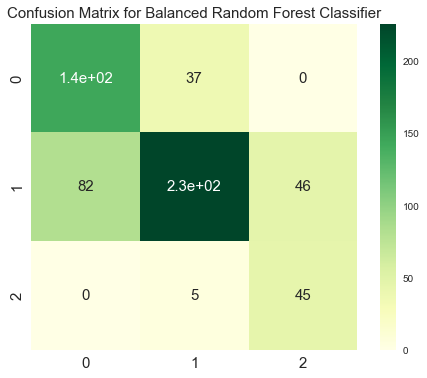

In [26]:
brfc = BalancedRandomForestClassifier(n_estimators=1400,min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=30, bootstrap=False)
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Balanced Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Balanced Random Forest Classifier')

### TPOT

In [27]:
model = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='balanced_accuracy', verbosity=3, n_jobs=-1)

In [28]:
# model.fit(x_train, y_train)

In [29]:
# model.export(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06 - ML\tpot_model.py')

In [30]:
features = paris_ml.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, paris_ml['target'], random_state=None)

# Average CV score on the training set was: 0.7987671078415679
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100)),
    GaussianNB()
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [31]:
acc_tpot = exported_pipeline.score(testing_features, testing_target)
print('The accuracy of the Stacking Estimator is:', acc_tpot * 100, '%')

The accuracy of the Stacking Estimator is: 69.76744186046511 %


C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [32]:
print(confusion_matrix(testing_target,results))
print(balanced_accuracy_score(testing_target,results))
print(f1_score(testing_target,results, average='weighted'))


[[185  19   0]
 [165 284  27]
 [  0  10  41]]
0.769140989729225
0.7032285648189281


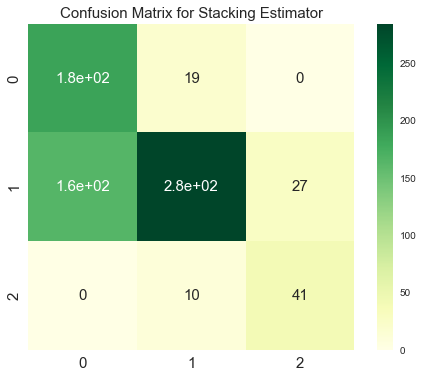

In [33]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(testing_target,results), annot = True, cmap = 'YlGn', annot_kws = {'size': 15}, square = True)
plt.title('Confusion Matrix for Stacking Estimator', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show() 

In [34]:
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67       204
           1       0.91      0.60      0.72       476
           2       0.60      0.80      0.69        51

    accuracy                           0.70       731
   macro avg       0.68      0.77      0.69       731
weighted avg       0.78      0.70      0.70       731



### New features selection only for Balanced Forest Classifier and TPOT proposed pipeline

In [35]:
# New features (proposed by RFECV)
X_new = X[features_selected]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2337, 8)
(2337,)
(585, 8)
(585,)


Balanced Random Forest Classifier

The accuracy of the Random Forest Classifier is: 71.7948717948718 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.65      0.80      0.71       181
           1       0.84      0.66      0.74       354
           2       0.50      0.88      0.64        50

    accuracy                           0.72       585
   macro avg       0.66      0.78      0.70       585
weighted avg       0.75      0.72      0.72       585


Balanced accuracy_score  0.7769824473785518

F1_score  0.7220038439092464


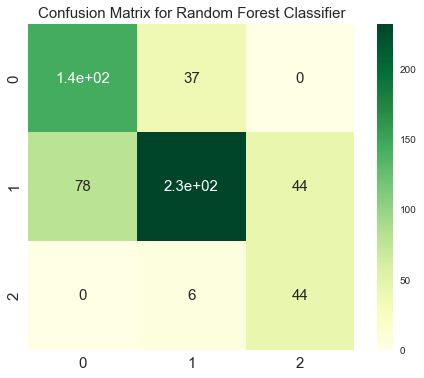

In [37]:
brfc = BalancedRandomForestClassifier()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
acc_brfc = brfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_brfc * 100, '%')
generate_results(brfc, y_pred, 'Random Forest Classifier')

Pipline Proposed by TPOT

In [38]:
features = X_new
training_features, testing_features, training_target, testing_target = \
            train_test_split(features,y, random_state=None)

# Average CV score on the training set was: 0.7987671078415679
exported_pipeline2 = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100)),
    GaussianNB()
)

exported_pipeline2.fit(training_features, training_target)
results = exported_pipeline2.predict(testing_features)

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [39]:
print(accuracy_score(testing_target,results))
print(confusion_matrix(testing_target,results))
print(balanced_accuracy_score(testing_target,results))
print(f1_score(testing_target,results, average='weighted'))

0.771545827633379
[[156  49   0]
 [ 60 365  48]
 [  0  10  43]]
0.7813221849159734
0.7777229176203722


In [40]:
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       205
           1       0.86      0.77      0.81       473
           2       0.47      0.81      0.60        53

    accuracy                           0.77       731
   macro avg       0.69      0.78      0.72       731
weighted avg       0.79      0.77      0.78       731



## Predictions for 10.02.2022

In [41]:
x_today = np.array([6.6, 86, 4.1, 18, 1024, 98, 12.5, 2, 0,0,1,0,1,2,1])

In [42]:
exported_pipeline.predict(x_today.reshape(1,-1))

C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\radek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Unsupervised Learning

In [43]:
def unsupervised_metrics(X, y_true, y_pred):
	print("Silhouette Coefficient is equal to:", (silhouette_score(X,y_pred)))
	print("Variance Ratio Crterion is equal to:", (calinski_harabasz_score(X, y_pred)))
	print("Adjusted mutual Information is equal to:", (adjusted_mutual_info_score(y_true,y_pred)))
	print("Completeness is equal to:", (completeness_score(y_true,y_pred)))
	print("Homogeneity is equal to:", (homogeneity_score(y_true,y_pred)))
	print("Adjusted Rand Index is equal to:", (adjusted_rand_score(y_true,y_pred)))
	print("Fowlkes Mallow Scorex is equal to:",(fowlkes_mallows_score(y_true,y_pred)))

Data

In [44]:
data_uml = paris_ml.drop(columns='target')

In [45]:
data_uml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
0,8.4,85.06,1.82,28.9,1006.1,26.7,24.8,0.0,0,1,1,0,0,1,2
1,9.9,81.63,4.96,29.2,1001.7,19.7,24.3,0.0,0,0,1,0,0,1,3
2,11.0,76.53,0.14,29.2,1006.0,20.1,20.4,0.0,0,1,1,0,0,1,4
3,9.1,80.53,0.67,21.5,1001.5,22.2,21.6,0.0,0,1,1,0,0,1,5
4,6.9,82.81,1.25,22.8,1007.5,22.8,24.0,0.0,0,1,1,0,0,1,6


### Elbow method

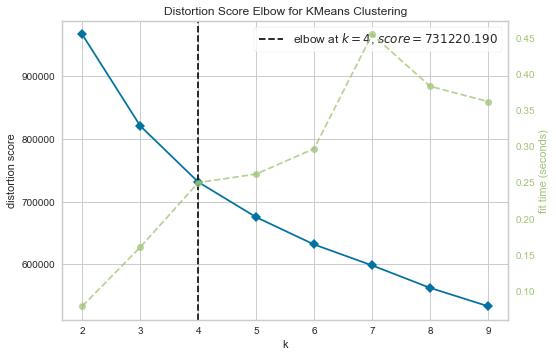

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_uml)
visualizer.poof()

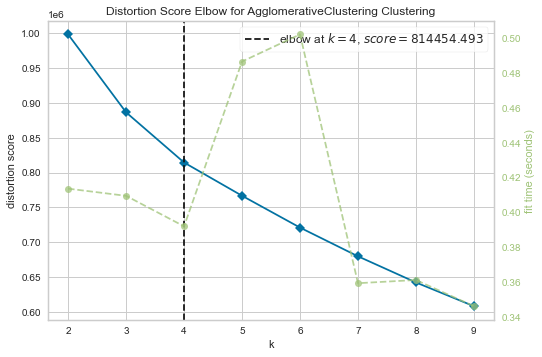

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_uml)
visualizer.poof()

### Models

#### KMeans

In [50]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data_uml)
y_kmeans = kmeans.predict(data_uml)
y_kmeans


array([2, 2, 2, ..., 2, 0, 0])

In [51]:
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_kmeans)

Silhouette Coefficient is equal to: 0.24171115145749905
Variance Ratio Crterion is equal to: 1145.4031590575687
Adjusted mutual Information is equal to: 0.051093463946734516
Completeness is equal to: 0.04560578292461093
Homogeneity is equal to: 0.05986464904291574
Adjusted Rand Index is equal to: 0.03233585816347375
Fowlkes Mallow Scorex is equal to: 0.4311655731011506


In [52]:
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(data_uml)
y_kmeans = kmeans.predict(data_uml)
y_kmeans
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_kmeans)


Silhouette Coefficient is equal to: 0.19245925256627774
Variance Ratio Crterion is equal to: 975.7080589817448
Adjusted mutual Information is equal to: 0.07164618435972983
Completeness is equal to: 0.05807829435698526
Homogeneity is equal to: 0.09648933688924693
Adjusted Rand Index is equal to: 0.03227167181753269
Fowlkes Mallow Scorex is equal to: 0.3783166749836848


In [ ]:
# sns.set_style('darkgrid')
# sns.scatterplot(data=data_uml, x='temp', y='Lat', hue='labels_kmeans', palette='RdYlBu')
# plt.show()

#### Agglomerative Clustering

In [ ]:
cluster_ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_ag = cluster_ag.fit_predict(data_uml)

In [ ]:
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_ag)

Silhouette Coefficient is equal to: 0.1106143869386786
Variance Ratio Crterion is equal to: 601.7619066776825
Adjusted mutual Information is equal to: 0.039639554793656016
Completeness is equal to: 0.030874402372098878
Homogeneity is equal to: 0.06096340289135434
Adjusted Rand Index is equal to: 0.010223913342330604
Fowlkes Mallow Scorex is equal to: 0.3260930848557058


DBSCAN

In [ ]:
dbscan = DBSCAN()
dbscan.fit(data_uml)
y_dbscan = dbscan.fit_predict(data_uml)
set(y_dbscan)


{-1}

In [ ]:
unsupervised_metrics(X=data_uml, y_true=paris_ml.target, y_pred=y_dbscan)